# 0.0 Import Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import model_selection as ms

# 1.0 Synthetic regression dataset

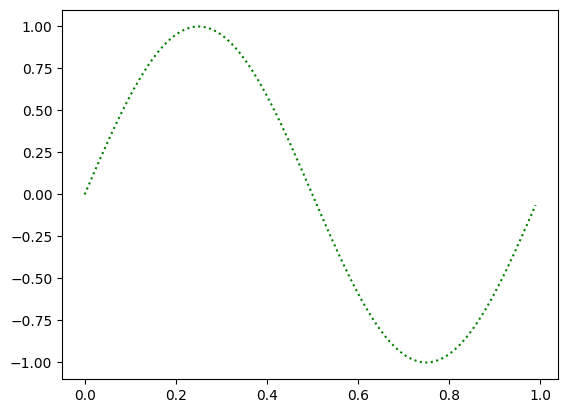

In [2]:
hidden_law = np.vectorize(lambda x: math.sin(2*math.pi*x)) # # made to run on vectors
x_all = np.arange(0, 1, 0.01)
y_hidden = hidden_law(x_all)
plt.plot(x_all, y_hidden, ':g');

np.random.seed(42)
noise = 0.2
samples = 20

# dataset
x = np.random.rand( samples )
y = np.sin( 2*np.pi*x ) + noise*np.random.randn( samples )

# split training and test dataset

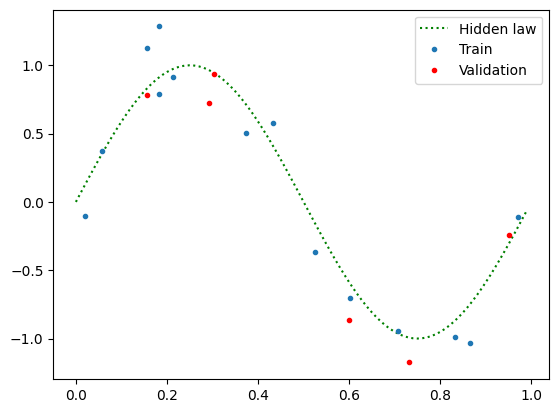

In [5]:
x_train, x_val, y_train, y_val = ms.train_test_split( x, y, test_size=0.3 )
plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_val, y_val, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation']);

# Treinamento

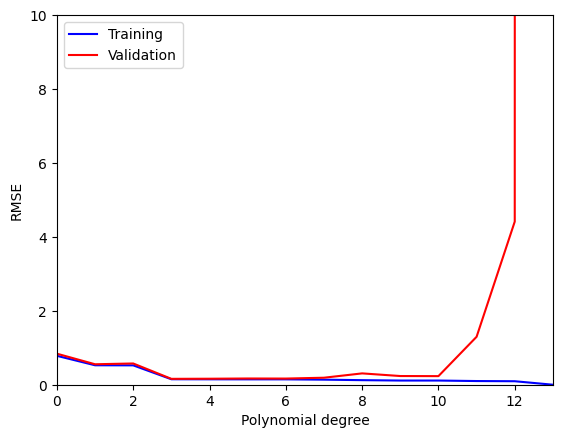

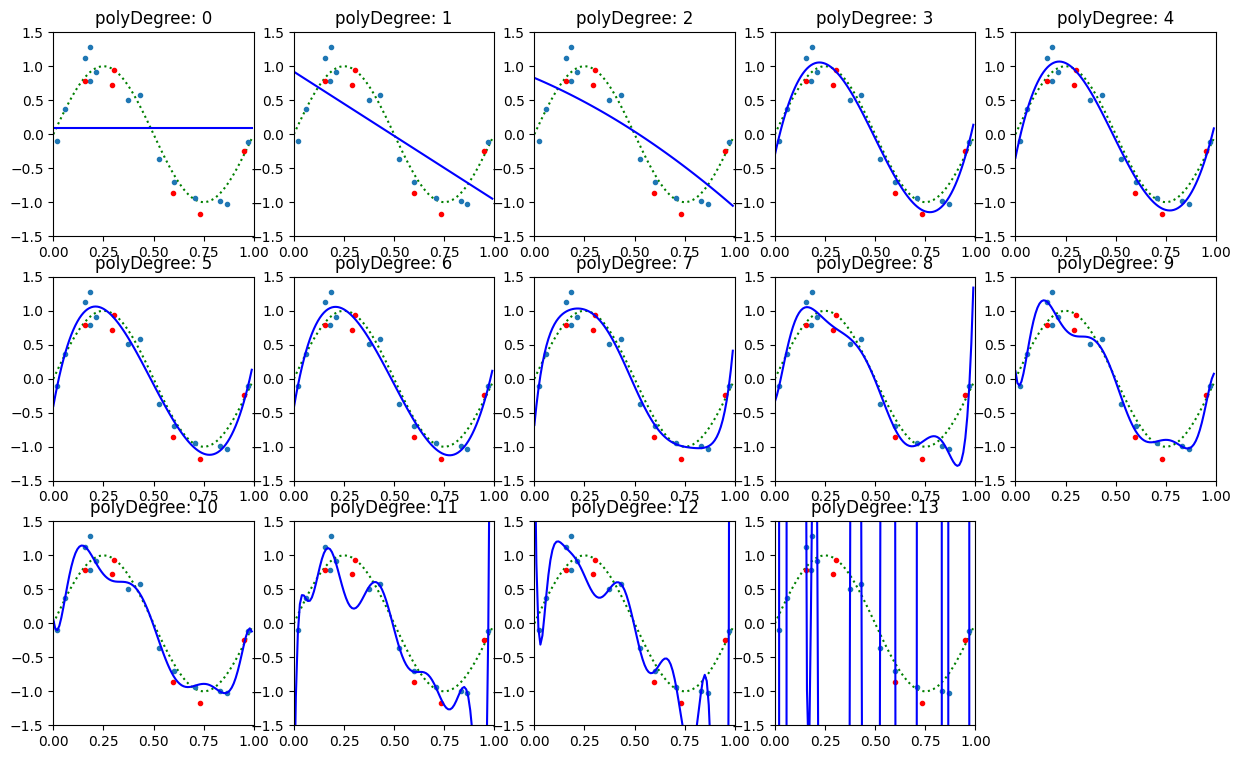

In [11]:
max_poly_degree = 14
poly_degrees = range(max_poly_degree)

polys = []
for p in poly_degrees:
    poly_model = np.polyfit( x_train, y_train, p )
    polys.append( poly_model )
    rmse_train = np.zeros( max_poly_degree )
    rmse_val = np.zeros( max_poly_degree)

for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt( np.mean( np.square( yhat_train - y_train ) ) )
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val )
    rmse_val[p] = np.sqrt( np.mean( np.square( yhat_val - y_val ) ) )

plt.plot( poly_degrees, rmse_train, 'b' )
plt.plot( poly_degrees, rmse_val, 'r' )
plt.axis( ( 0, max_poly_degree-1, 0, 10 ) )
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');

plt.figure(figsize=(15, 9))
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title(f'polyDegree: {p}')
    plt.axis((0, 1, -1.5, 1.5))